In [1]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv('Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df.drop(['RowNumber','CustomerId'],axis=1,inplace =True)

In [11]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.shape

(10000, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [17]:
df.isnull()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [21]:
df.drop(['Surname'],axis=1,inplace=True)

In [23]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [25]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [28]:
num_cols =['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',]
catgo_cols =['Geography', 'Gender']

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),num_cols),
         ('cat', OneHotEncoder(drop='first'),catgo_cols)
    ])

In [33]:
X = df.drop(['Exited'],axis=1)
y =df['Exited']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test =train_test_split(X,y, test_size=0.2,random_state=42)

In [132]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', LogisticRegression(random_state=42))])


In [43]:
logistic_pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography', 'Gender'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [45]:
y_pred_logistic = logistic_pipeline.predict(x_test)

In [47]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

In [49]:
logistic_report = classification_report(y_test, y_pred_logistic)
logistic_roc_auc = roc_auc_score(y_test, logistic_pipeline.predict_proba(x_test)[:, 1])


In [51]:
print("=== Logistic Regression ===")
print(logistic_report)
print("ROC-AUC:", logistic_roc_auc)
print("accuracy : ",accuracy_score(y_test,y_pred_logistic))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

ROC-AUC: 0.7788745485321058
accuracy :  0.811


In [53]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
from imblearn.over_sampling import SMOTE

In [71]:
df =pd.get_dummies(df,columns=['Geography'], drop_first=True)

In [73]:
from sklearn.preprocessing import LabelEncoder

In [75]:
le = LabelEncoder()

In [77]:
df['Gender'] = le.fit_transform(df['Gender'])

In [85]:
X = df.drop(['Exited'],axis=1)
y =df['Exited']

In [87]:
x_train,x_test,y_train,y_test =train_test_split(X,y, test_size=0.2,random_state=42)

In [89]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [99]:
rf_model = RandomForestClassifier(random_state=42)

In [103]:
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [105]:
y_pred_rf = rf_model.predict(x_test)

In [119]:
y_pred_rf.shape

(2000,)

In [121]:
y_pred_rf

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [139]:
x_test['prediction_randomforest'] = y_pred_rf

In [141]:
prediction_count = x_test['prediction_randomforest'].value_counts()


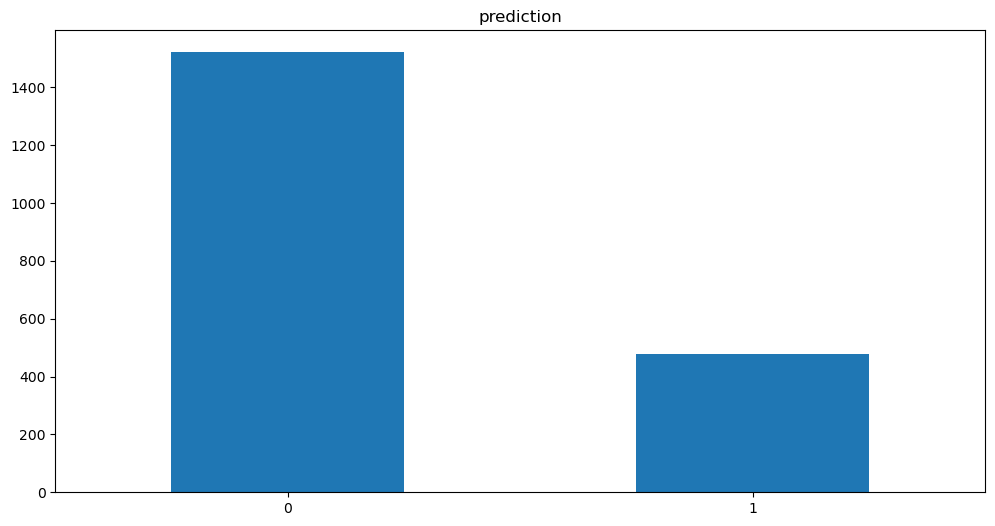

In [143]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.title('prediction')
prediction_count .plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [145]:
x_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,pred_rf,prediction_randomforest
6252,596,1,32,3,96709.07,2,0,0,41788.37,1,0,0,0
4684,623,1,43,1,0.00,2,1,1,146379.30,0,0,0,0
1731,601,0,44,4,0.00,2,1,0,58561.31,0,1,0,0
4742,506,1,59,8,119152.10,2,1,1,170679.74,1,0,0,0
4521,560,0,27,7,124995.98,1,1,1,114669.79,0,1,0,0


In [109]:
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1]))

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1607
           1       0.53      0.65      0.58       393

    accuracy                           0.82      2000
   macro avg       0.72      0.75      0.73      2000
weighted avg       0.84      0.82      0.83      2000

ROC-AUC: 0.8306383807483481


In [135]:

new_data = pd.DataFrame({
    'CreditScore': [602],
    'Gender': [0], 
    'Age': [53],
    'Tenure': [5],
    'Balance': [98268.84],
    'NumOfProducts': [1],
    'HasCrCard': [0],
    'IsActiveMember': [1],
    'EstimatedSalary': [45038.29],
    'Geography_Germany': [1],  
    'Geography_Spain': [0]   
})


new_pred = rf_model.predict(new_data)
new_pred_proba = rf_model.predict_proba(new_data)[:, 1]

print("Predicted Class for New Data:", new_pred[0])  
print("Predicted Probability for Churn:", new_pred_proba[0])


Predicted Class for New Data: 1
Predicted Probability for Churn: 0.92
